## import libraries and collect data

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

## View and Analyze data

In [32]:
for i in range(5):
    print(digits.data[i])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14

<Figure size 432x288 with 0 Axes>

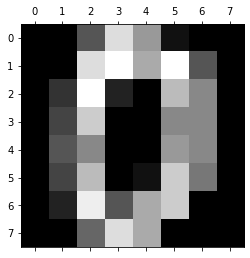

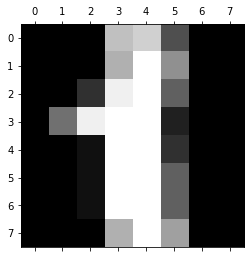

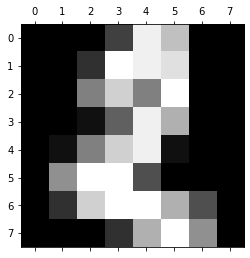

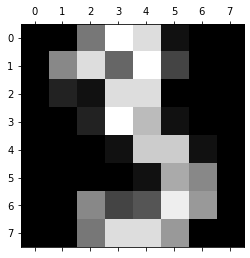

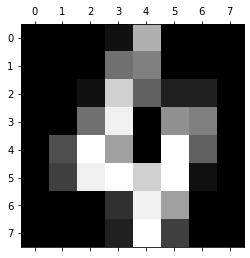

In [33]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [34]:
digits.target[0:5], len(digits.target)

(array([0, 1, 2, 3, 4]), 1797)

In [35]:
digits.target_names[0:5], len(digits.target_names)

(array([0, 1, 2, 3, 4]), 10)

In [36]:
len(digits.data)

1797

## Create model (train)

In [37]:
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [38]:
len(X_train)

1437

In [39]:
len(X_test)

360

In [43]:
mymodel = LogisticRegression(max_iter=10000)
mymodel.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

## Evaluate model (test)

In [46]:
Y_test[0:5]

array([6, 5, 1, 4, 8])

In [47]:
mymodel.predict(X_test[0:5])

array([6, 5, 1, 4, 8])

In [44]:
mymodel.score(X_test, Y_test)

0.9638888888888889

In [52]:
Y_predicted = mymodel.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 33,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1, 32,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  1, 40]], dtype=int64)

Text(69.0, 0.5, 'Truth')

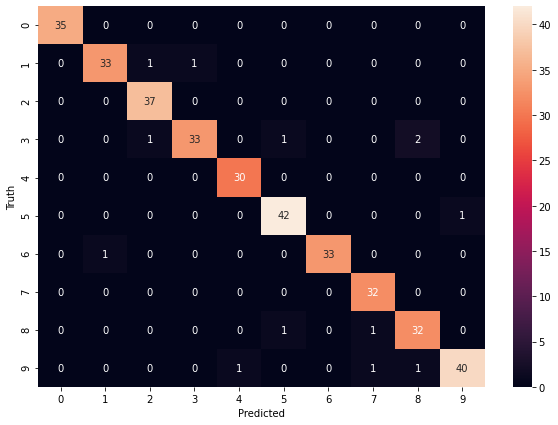

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")